In [1]:
# Import dependencies
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np

In [2]:
# Read the csv file into a pandas DataFrame

events_df = pd.read_csv('data/CleanedSet_csv.csv', low_memory=False)

### Clean data

In [3]:
events_df = events_df[pd.notnull(events_df['Year'])]
len(events_df)

69658

In [4]:
df = events_df[events_df.Year.str.contains("Z") == True]
df

,Type,Rating,Latitude,Longitude,Year,Magnitude,Mass,VEI
10882,Earthquake,1,36.344,142.344,520Z,5.8,NaN,NaN
16603,Earthquake,1,8.017,124.075,000Z,5.6,NaN,NaN
18598,Earthquake,1,-32.998,-71.766,530Z,5.6,NaN,NaN


In [5]:
events_df = events_df.drop([10882,16603,18598])

In [6]:
events_df["Year"] = events_df["Year"].astype(int)

In [7]:
events_df = events_df.fillna(0)

### Create csv (later coverted to geoJSON) for Leaflet

In [8]:
big_events = events_df.loc[events_df.Rating > 2]

In [9]:
big_events.to_csv("bigevents.csv")

### Attempt categoric predictions with Keras

In [10]:
events_df.loc[events_df.Type == "Earthquake", "Type"] = 0
events_df.loc[events_df.Type == "Meteor", "Type"] = 1
events_df.loc[events_df.Type == "Volcano", "Type"] = 2
events_df.head()

,Type,Rating,Latitude,Longitude,Year,Magnitude,Mass,VEI
0,2,1,32.880,131.100,1979,0.0,0.0,2.0
1,2,1,-4.649,145.964,1979,0.0,0.0,2.0
2,2,1,40.821,14.426,1737,0.0,0.0,2.0
3,2,1,12.770,124.050,1978,0.0,0.0,2.0
4,2,1,37.734,15.004,1979,0.0,0.0,2.0


In [11]:
print("Earthquake events : "+str(len(events_df[events_df.Type== 0])))
print("Meteor events : "+str(len(events_df[events_df.Type== 1])))
print("Volcano events : "+str(len(events_df[events_df.Type== 2])))

Earthquake events : 23409
Meteor events : 45428
Volcano events : 818


In [12]:
print("Level 5 events : "+str(len(events_df[events_df.Rating== 5])))
print("Level 4 events : "+str(len(events_df[events_df.Rating== 4])))
print("Level 3 events : "+str(len(events_df[events_df.Rating== 3])))
print("Level 2 events : "+str(len(events_df[events_df.Rating== 2])))
print("Level 1 events : "+str(len(events_df[events_df.Rating== 1])))

Level 5 events : 59
Level 4 events : 66
Level 3 events : 193
Level 2 events : 474
Level 1 events : 68863


In [13]:
# Step 0: Reformat data
data = events_df.values
X = data[:, 0:5]
y = data[:, 0]

In [14]:
X[0]

array([2.000e+00, 1.000e+00, 3.288e+01, 1.311e+02, 1.979e+03])

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=None)

In [16]:
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)

In [17]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [18]:
from keras.utils import to_categorical

# One-hot encoding
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)
y_train_categorical

Using TensorFlow backend.


array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       ...,
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.]], dtype=float32)

In [19]:
from keras.models import Sequential

model = Sequential()

In [20]:
from keras.layers import Dense
number_inputs = 5
number_hidden_nodes = 4
model.add(Dense(units=number_hidden_nodes,
                activation='relu', input_dim=number_inputs))

In [21]:
number_classes = 3
model.add(Dense(units=number_classes, activation='softmax'))

In [22]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 4)                 24        
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 15        
Total params: 39
Trainable params: 39
Non-trainable params: 0
_________________________________________________________________


In [23]:
# Use categorical crossentropy for categorical data and mean squared error for regression
# Hint: your output layer in this example is using software for logistic regression (categorical)
# If your output layer activation was `linear` then you may want to use `mse` for loss
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [24]:
# Fit (train) the model
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=1000,
    shuffle=True,
    verbose=2
)

Epoch 1/1000
 - 2s - loss: 0.4078 - acc: 0.9082
Epoch 2/1000
 - 2s - loss: 0.1043 - acc: 0.9916
Epoch 3/1000
 - 2s - loss: 0.0382 - acc: 0.9942
Epoch 4/1000
 - 2s - loss: 0.0127 - acc: 0.9995
Epoch 5/1000
 - 2s - loss: 0.0050 - acc: 1.0000
Epoch 6/1000
 - 2s - loss: 0.0022 - acc: 1.0000
Epoch 7/1000
 - 2s - loss: 9.5714e-04 - acc: 1.0000
Epoch 8/1000
 - 2s - loss: 4.3373e-04 - acc: 1.0000
Epoch 9/1000
 - 2s - loss: 1.9865e-04 - acc: 1.0000
Epoch 10/1000
 - 2s - loss: 9.1357e-05 - acc: 1.0000
Epoch 11/1000
 - 2s - loss: 4.2298e-05 - acc: 1.0000
Epoch 12/1000
 - 2s - loss: 1.9627e-05 - acc: 1.0000
Epoch 13/1000
 - 2s - loss: 9.1588e-06 - acc: 1.0000
Epoch 14/1000
 - 2s - loss: 4.2773e-06 - acc: 1.0000
Epoch 15/1000
 - 2s - loss: 2.0336e-06 - acc: 1.0000
Epoch 16/1000
 - 2s - loss: 9.8270e-07 - acc: 1.0000
Epoch 17/1000
 - 2s - loss: 5.0728e-07 - acc: 1.0000
Epoch 18/1000
 - 2s - loss: 2.9046e-07 - acc: 1.0000
Epoch 19/1000
 - 2s - loss: 1.9645e-07 - acc: 1.0000
Epoch 20/1000
 - 2s - loss

 - 2s - loss: 1.1921e-07 - acc: 1.0000
Epoch 156/1000
 - 2s - loss: 1.1921e-07 - acc: 1.0000
Epoch 157/1000
 - 2s - loss: 1.1921e-07 - acc: 1.0000
Epoch 158/1000
 - 2s - loss: 1.1921e-07 - acc: 1.0000
Epoch 159/1000
 - 1s - loss: 1.1921e-07 - acc: 1.0000
Epoch 160/1000
 - 1s - loss: 1.1921e-07 - acc: 1.0000
Epoch 161/1000
 - 1s - loss: 1.1921e-07 - acc: 1.0000
Epoch 162/1000
 - 1s - loss: 1.1921e-07 - acc: 1.0000
Epoch 163/1000
 - 1s - loss: 1.1921e-07 - acc: 1.0000
Epoch 164/1000
 - 1s - loss: 1.1921e-07 - acc: 1.0000
Epoch 165/1000
 - 1s - loss: 1.1921e-07 - acc: 1.0000
Epoch 166/1000
 - 1s - loss: 1.1921e-07 - acc: 1.0000
Epoch 167/1000
 - 1s - loss: 1.1921e-07 - acc: 1.0000
Epoch 168/1000
 - 1s - loss: 1.1921e-07 - acc: 1.0000
Epoch 169/1000
 - 1s - loss: 1.1921e-07 - acc: 1.0000
Epoch 170/1000
 - 1s - loss: 1.1921e-07 - acc: 1.0000
Epoch 171/1000
 - 1s - loss: 1.1921e-07 - acc: 1.0000
Epoch 172/1000
 - 1s - loss: 1.1921e-07 - acc: 1.0000
Epoch 173/1000
 - 1s - loss: 1.1921e-07 - a

Epoch 307/1000
 - 1s - loss: 1.1921e-07 - acc: 1.0000
Epoch 308/1000
 - 1s - loss: 1.1921e-07 - acc: 1.0000
Epoch 309/1000
 - 1s - loss: 1.1921e-07 - acc: 1.0000
Epoch 310/1000
 - 1s - loss: 1.1921e-07 - acc: 1.0000
Epoch 311/1000
 - 1s - loss: 1.1921e-07 - acc: 1.0000
Epoch 312/1000
 - 1s - loss: 1.1921e-07 - acc: 1.0000
Epoch 313/1000
 - 1s - loss: 1.1921e-07 - acc: 1.0000
Epoch 314/1000
 - 1s - loss: 1.1921e-07 - acc: 1.0000
Epoch 315/1000
 - 1s - loss: 1.1921e-07 - acc: 1.0000
Epoch 316/1000
 - 1s - loss: 1.1921e-07 - acc: 1.0000
Epoch 317/1000
 - 1s - loss: 1.1921e-07 - acc: 1.0000
Epoch 318/1000
 - 1s - loss: 1.1921e-07 - acc: 1.0000
Epoch 319/1000
 - 1s - loss: 1.1921e-07 - acc: 1.0000
Epoch 320/1000
 - 1s - loss: 1.1921e-07 - acc: 1.0000
Epoch 321/1000
 - 1s - loss: 1.1921e-07 - acc: 1.0000
Epoch 322/1000
 - 1s - loss: 1.1921e-07 - acc: 1.0000
Epoch 323/1000
 - 1s - loss: 1.1921e-07 - acc: 1.0000
Epoch 324/1000
 - 1s - loss: 1.1921e-07 - acc: 1.0000
Epoch 325/1000
 - 1s - loss:

Epoch 459/1000
 - 1s - loss: 1.1921e-07 - acc: 1.0000
Epoch 460/1000
 - 1s - loss: 1.1921e-07 - acc: 1.0000
Epoch 461/1000
 - 1s - loss: 1.1921e-07 - acc: 1.0000
Epoch 462/1000
 - 1s - loss: 1.1921e-07 - acc: 1.0000
Epoch 463/1000
 - 1s - loss: 1.1921e-07 - acc: 1.0000
Epoch 464/1000
 - 1s - loss: 1.1921e-07 - acc: 1.0000
Epoch 465/1000
 - 1s - loss: 1.1921e-07 - acc: 1.0000
Epoch 466/1000
 - 1s - loss: 1.1921e-07 - acc: 1.0000
Epoch 467/1000
 - 1s - loss: 1.1921e-07 - acc: 1.0000
Epoch 468/1000
 - 1s - loss: 1.1921e-07 - acc: 1.0000
Epoch 469/1000
 - 1s - loss: 1.1921e-07 - acc: 1.0000
Epoch 470/1000
 - 1s - loss: 1.1921e-07 - acc: 1.0000
Epoch 471/1000
 - 1s - loss: 1.1921e-07 - acc: 1.0000
Epoch 472/1000
 - 1s - loss: 1.1921e-07 - acc: 1.0000
Epoch 473/1000
 - 1s - loss: 1.1921e-07 - acc: 1.0000
Epoch 474/1000
 - 1s - loss: 1.1921e-07 - acc: 1.0000
Epoch 475/1000
 - 1s - loss: 1.1921e-07 - acc: 1.0000
Epoch 476/1000
 - 1s - loss: 1.1921e-07 - acc: 1.0000
Epoch 477/1000
 - 1s - loss:

Epoch 611/1000
 - 1s - loss: 1.1921e-07 - acc: 1.0000
Epoch 612/1000
 - 1s - loss: 1.1921e-07 - acc: 1.0000
Epoch 613/1000
 - 1s - loss: 1.1921e-07 - acc: 1.0000
Epoch 614/1000
 - 1s - loss: 1.1921e-07 - acc: 1.0000
Epoch 615/1000
 - 1s - loss: 1.1921e-07 - acc: 1.0000
Epoch 616/1000
 - 1s - loss: 1.1921e-07 - acc: 1.0000
Epoch 617/1000
 - 1s - loss: 1.1921e-07 - acc: 1.0000
Epoch 618/1000
 - 1s - loss: 1.1921e-07 - acc: 1.0000
Epoch 619/1000
 - 1s - loss: 1.1921e-07 - acc: 1.0000
Epoch 620/1000
 - 1s - loss: 1.1921e-07 - acc: 1.0000
Epoch 621/1000
 - 1s - loss: 1.1921e-07 - acc: 1.0000
Epoch 622/1000
 - 1s - loss: 1.1921e-07 - acc: 1.0000
Epoch 623/1000
 - 1s - loss: 1.1921e-07 - acc: 1.0000
Epoch 624/1000
 - 1s - loss: 1.1921e-07 - acc: 1.0000
Epoch 625/1000
 - 1s - loss: 1.1921e-07 - acc: 1.0000
Epoch 626/1000
 - 1s - loss: 1.1921e-07 - acc: 1.0000
Epoch 627/1000
 - 1s - loss: 1.1921e-07 - acc: 1.0000
Epoch 628/1000
 - 1s - loss: 1.1921e-07 - acc: 1.0000
Epoch 629/1000
 - 1s - loss:

Epoch 763/1000
 - 1s - loss: 1.1921e-07 - acc: 1.0000
Epoch 764/1000
 - 1s - loss: 1.1921e-07 - acc: 1.0000
Epoch 765/1000
 - 1s - loss: 1.1921e-07 - acc: 1.0000
Epoch 766/1000
 - 1s - loss: 1.1921e-07 - acc: 1.0000
Epoch 767/1000
 - 1s - loss: 1.1921e-07 - acc: 1.0000
Epoch 768/1000
 - 1s - loss: 1.1921e-07 - acc: 1.0000
Epoch 769/1000
 - 1s - loss: 1.1921e-07 - acc: 1.0000
Epoch 770/1000
 - 1s - loss: 1.1921e-07 - acc: 1.0000
Epoch 771/1000
 - 1s - loss: 1.1921e-07 - acc: 1.0000
Epoch 772/1000
 - 1s - loss: 1.1921e-07 - acc: 1.0000
Epoch 773/1000
 - 1s - loss: 1.1921e-07 - acc: 1.0000
Epoch 774/1000
 - 1s - loss: 1.1921e-07 - acc: 1.0000
Epoch 775/1000
 - 1s - loss: 1.1921e-07 - acc: 1.0000
Epoch 776/1000
 - 1s - loss: 1.1921e-07 - acc: 1.0000
Epoch 777/1000
 - 1s - loss: 1.1921e-07 - acc: 1.0000
Epoch 778/1000
 - 1s - loss: 1.1921e-07 - acc: 1.0000
Epoch 779/1000
 - 1s - loss: 1.1921e-07 - acc: 1.0000
Epoch 780/1000
 - 1s - loss: 1.1921e-07 - acc: 1.0000
Epoch 781/1000
 - 1s - loss:

Epoch 915/1000
 - 1s - loss: 1.1921e-07 - acc: 1.0000
Epoch 916/1000
 - 1s - loss: 1.1921e-07 - acc: 1.0000
Epoch 917/1000
 - 1s - loss: 1.1921e-07 - acc: 1.0000
Epoch 918/1000
 - 1s - loss: 1.1921e-07 - acc: 1.0000
Epoch 919/1000
 - 1s - loss: 1.1921e-07 - acc: 1.0000
Epoch 920/1000
 - 1s - loss: 1.1921e-07 - acc: 1.0000
Epoch 921/1000
 - 1s - loss: 1.1921e-07 - acc: 1.0000
Epoch 922/1000
 - 1s - loss: 1.1921e-07 - acc: 1.0000
Epoch 923/1000
 - 1s - loss: 1.1921e-07 - acc: 1.0000
Epoch 924/1000
 - 1s - loss: 1.1921e-07 - acc: 1.0000
Epoch 925/1000
 - 1s - loss: 1.1921e-07 - acc: 1.0000
Epoch 926/1000
 - 1s - loss: 1.1921e-07 - acc: 1.0000
Epoch 927/1000
 - 1s - loss: 1.1921e-07 - acc: 1.0000
Epoch 928/1000
 - 1s - loss: 1.1921e-07 - acc: 1.0000
Epoch 929/1000
 - 1s - loss: 1.1921e-07 - acc: 1.0000
Epoch 930/1000
 - 1s - loss: 1.1921e-07 - acc: 1.0000
Epoch 931/1000
 - 1s - loss: 1.1921e-07 - acc: 1.0000
Epoch 932/1000
 - 1s - loss: 1.1921e-07 - acc: 1.0000
Epoch 933/1000
 - 1s - loss:

In [25]:
# Evaluate the model using the testing data
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Loss: 1.1921955795174174e-07, Accuracy: 1.0


In [26]:
for x in range(100):
    new_data = np.array([[np.random.randint(0,2), np.random.randint(1,5),
    np.random.randint(-90,90),np.random.randint(-180,180),np.random.randint(2019,2100)]])
    print(f"Predicted class: {model.predict_classes(new_data)}")

Predicted class: [1]
Predicted class: [1]
Predicted class: [1]
Predicted class: [1]
Predicted class: [1]
Predicted class: [1]
Predicted class: [1]
Predicted class: [1]
Predicted class: [1]
Predicted class: [1]
Predicted class: [1]
Predicted class: [1]
Predicted class: [1]
Predicted class: [1]
Predicted class: [1]
Predicted class: [1]
Predicted class: [1]
Predicted class: [1]
Predicted class: [1]
Predicted class: [1]
Predicted class: [1]
Predicted class: [1]
Predicted class: [1]
Predicted class: [1]
Predicted class: [1]
Predicted class: [1]
Predicted class: [1]
Predicted class: [1]
Predicted class: [1]
Predicted class: [1]
Predicted class: [1]
Predicted class: [1]
Predicted class: [1]
Predicted class: [1]
Predicted class: [1]
Predicted class: [1]
Predicted class: [1]
Predicted class: [1]
Predicted class: [1]
Predicted class: [1]
Predicted class: [1]
Predicted class: [1]
Predicted class: [1]
Predicted class: [1]
Predicted class: [1]
Predicted class: [1]
Predicted class: [1]
Predicted cla

### Attempt KNeighbors classification 

In [27]:
target = events_df["Type"]
target_names = ["Earthquake", "Meteor", "Volcano"]

In [28]:
data = events_df.drop("Type", axis=1)
feature_names = data.columns
data.head(1)

,Rating,Latitude,Longitude,Year,Magnitude,Mass,VEI
0,1,32.88,131.1,1979,0.0,0.0,2.0


In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

k: 1, Train/Test Score: 1.000/0.998
k: 3, Train/Test Score: 0.998/0.997
k: 5, Train/Test Score: 0.997/0.995
k: 7, Train/Test Score: 0.996/0.995
k: 9, Train/Test Score: 0.995/0.995
k: 11, Train/Test Score: 0.995/0.994
k: 13, Train/Test Score: 0.994/0.994
k: 15, Train/Test Score: 0.994/0.993
k: 17, Train/Test Score: 0.993/0.993
k: 19, Train/Test Score: 0.993/0.993


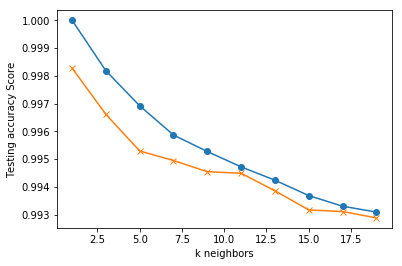

In [30]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [31]:
limit_events_df = events_df[["Type", "Rating", "Latitude", "Longitude", "Year"]]
limit_events_df.head(1)

,Type,Rating,Latitude,Longitude,Year
0,2,1,32.88,131.1,1979


In [32]:
data = limit_events_df.drop("Type", axis=1)
feature_names = data.columns
data.head()

,Rating,Latitude,Longitude,Year
0,1,32.880,131.100,1979
1,1,-4.649,145.964,1979
2,1,40.821,14.426,1737
3,1,12.770,124.050,1978
4,1,37.734,15.004,1979


In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

k: 1, Train/Test Score: 1.000/0.986
k: 3, Train/Test Score: 0.992/0.987
k: 5, Train/Test Score: 0.990/0.986
k: 7, Train/Test Score: 0.988/0.986
k: 9, Train/Test Score: 0.988/0.985
k: 11, Train/Test Score: 0.987/0.985
k: 13, Train/Test Score: 0.987/0.984
k: 15, Train/Test Score: 0.986/0.984
k: 17, Train/Test Score: 0.986/0.984
k: 19, Train/Test Score: 0.985/0.984


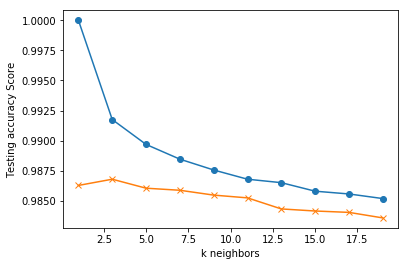

In [34]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [35]:
# Note that k: 11 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train, y_train)
print('k=13 Test Acc: %.3f' % knn.score(X_test, y_test))

k=13 Test Acc: 0.985


In [36]:
sample = [5, 19.8968, 155.5828, 2025]
myarray = np.asarray(sample)
knn.predict([myarray])

array([0], dtype=int64)

In [37]:
samples = []
knns = []
for x in range(100):
    sample = [np.random.randint(1,5), np.random.randint(-90,90),np.random.randint(-180,180),np.random.randint(2019,2100)]
    samples.append(sample)
    myknn = knn.predict([sample])
    knns.append(myknn)

In [38]:
samples

[[2, -82, 72, 2057],
 [1, 76, -43, 2019],
 [2, 68, 150, 2095],
 [2, -8, 128, 2039],
 [4, 64, 33, 2031],
 [2, 35, 107, 2074],
 [3, 23, 87, 2032],
 [1, -43, -179, 2047],
 [4, 35, 53, 2033],
 [3, 61, 128, 2077],
 [4, 34, -130, 2092],
 [3, 78, -27, 2088],
 [1, 25, -112, 2097],
 [1, 47, 136, 2033],
 [4, 28, 121, 2037],
 [2, -72, 93, 2092],
 [1, 36, 165, 2073],
 [3, 17, 60, 2026],
 [1, 46, 114, 2035],
 [2, 74, 1, 2083],
 [3, 30, 143, 2076],
 [2, 28, 116, 2085],
 [1, -72, 136, 2062],
 [2, -54, -113, 2028],
 [1, 59, -105, 2096],
 [2, 61, 76, 2085],
 [2, 14, 76, 2055],
 [3, 20, -3, 2091],
 [4, 61, 8, 2040],
 [3, -71, -146, 2043],
 [2, 67, 118, 2028],
 [1, -53, -26, 2054],
 [2, 83, 2, 2074],
 [3, -16, -32, 2074],
 [3, 61, -72, 2048],
 [2, -49, 52, 2094],
 [1, -14, -177, 2086],
 [4, -12, 64, 2057],
 [2, 20, -5, 2063],
 [2, 29, -88, 2039],
 [2, -28, -22, 2050],
 [1, -6, -133, 2044],
 [3, 9, -175, 2092],
 [1, -77, 157, 2059],
 [2, -81, -159, 2093],
 [1, 52, 41, 2040],
 [4, 25, -21, 2030],
 [2, 67, 

In [39]:
knns

[array([1], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([1], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([1], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([1], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([1], 

### Attempt multi-linear regression

In [40]:
limit_events_df = events_df[["Type", "Rating", "Latitude", "Longitude", "Year"]]
limit_events_df.head(1)

,Type,Rating,Latitude,Longitude,Year
0,2,1,32.88,131.1,1979


In [41]:
y = limit_events_df[["Latitude","Longitude"]]
X = limit_events_df[["Year","Type", "Rating"]]
print(X.shape, y.shape)

(69655, 3) (69655, 2)


In [42]:
# Use train_test_split to create training and testing data

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### END SOLUTION

In [43]:
# Create the model using LinearRegression

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
### END SOLUTION

In [44]:
# Fit the model to the training data and calculate the scores for the training and testing data

### BEGIN SOLUTION
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.02343751784201049
Testing Score: 0.024312887719367945


In [45]:
model.predict([[2020,3,1]])

array([[-92.47400931,  74.2626501 ]])

In [46]:
a = 2019
b = [0,1,2]
c = [1,2,3,4,5]

inputs = []
predictions = []
for r in range(5):
    for s in range(3):
        prediction = model.predict([[a,b[s],c[r]]])
        this_input = [a,b[s],c[r]]
        predictions.append(prediction)
        inputs.append(this_input)

In [47]:
predictions

[array([[-1.40904754, 40.70017411]]),
 array([[-31.75569279,  51.88216732]]),
 array([[-62.10233803,  63.06416053]]),
 array([[16.21012858, 36.19504686]]),
 array([[-14.13651666,  47.37704007]]),
 array([[-44.4831619 ,  58.55903328]]),
 array([[33.82930471, 31.68991961]]),
 array([[ 3.48265947, 42.87191282]]),
 array([[-26.86398577,  54.05390603]]),
 array([[51.44848084, 27.18479236]]),
 array([[21.1018356 , 38.36678557]]),
 array([[-9.24480964, 49.54877878]]),
 array([[69.06765696, 22.6796651 ]]),
 array([[38.72101172, 33.86165832]]),
 array([[ 8.37436648, 45.04365153]])]

In [48]:
inputs

[[2019, 0, 1],
 [2019, 1, 1],
 [2019, 2, 1],
 [2019, 0, 2],
 [2019, 1, 2],
 [2019, 2, 2],
 [2019, 0, 3],
 [2019, 1, 3],
 [2019, 2, 3],
 [2019, 0, 4],
 [2019, 1, 4],
 [2019, 2, 4],
 [2019, 0, 5],
 [2019, 1, 5],
 [2019, 2, 5]]

In [49]:
types = []
ratings= []
latitudes = []
longitudes = []
years = []

for t in range(15):
    types.append(inputs[t][1])
    ratings.append(inputs[t][2])
    latitudes.append(str(predictions[t]).split(" ")[0].split("[[")[1])
    longitudes.append(str(predictions[t]).split(" ")[1].split("]]")[0])
    years.append(inputs[t][0])

In [50]:
latitudes[7] = str(predictions[7]).split("  ")[0].split(" ")[1]
latitudes[14] = str(predictions[14]).split("  ")[0].split(" ")[1]

In [51]:
longitudes[1] = str(predictions[1]).split("  ")[1].split("]]")[0]
longitudes[2] = str(predictions[2]).split("  ")[1].split("]]")[0]
longitudes[4] = str(predictions[4]).split("  ")[1].split("]]")[0]
longitudes[5] = str(predictions[5]).split("  ")[1].split("]]")[0]
longitudes[7] = str(predictions[7]).split(" ")[2].split("]]")[0]
longitudes[8] = str(predictions[8]).split("  ")[1].split("]]")[0]
longitudes[10] = str(predictions[10]).split("  ")[1].split("]]")[0]
longitudes[14] = str(predictions[14]).split(" ")[2].split("]]")[0]

In [52]:
datadf = {"Type": types,
         "Rating": ratings,
         "Latitude":latitudes,
         "Longitude": longitudes,
         "Year": years}
predictions_df = pd.DataFrame(data = datadf, columns = ["Type", "Rating", "Latitude", "Longitude", "Year"])

In [53]:
predictions_df = predictions_df.sort_values(by=['Type']).reindex()
predictions_df

,Type,Rating,Latitude,Longitude,Year
0,0,1,-1.40904754,40.70017411,2019
3,0,2,16.21012858,36.19504686,2019
6,0,3,33.82930471,31.68991961,2019
9,0,4,51.44848084,27.18479236,2019
12,0,5,69.06765696,22.6796651,2019
1,1,1,-31.75569279,51.88216732,2019
4,1,2,-14.13651666,47.37704007,2019
7,1,3,3.48265947,42.87191282,2019
10,1,4,21.1018356,38.36678557,2019
13,1,5,38.72101172,33.86165832,2019


In [54]:
predictions_df.to_csv("2019_predictions.csv")

### What I learned about modeling this data
#### Our ultimate goal was to predict the next "event" by selecting a location, and have our model tell us what Type, Rating and Year this would occur.  This was overly-ambitious/crazy, as the models I explored worked best (if at all) predicting one characteristic based on multiple known charicteristics not multiple characteristics based on one/two known characteristics. 
#### Our data set was contained less than 1000 points of volcanos, while we had tens of thousands of points for meteors and earthquakes.  My machine accurately predicted that based on this data, a volcano will almost never occur.
#### The concept of time in modeling - not sure the interger value of a year is the best way to model this.  Not that I was ever successful in predicting Year, but I have a feeling that in order to get closer you'd need to someting along the lines of "time between events" and possibly use your last prediction of this value to update your next test input.  Something along the lines of "well a meteor didn't strike today, so now that the time between events is larger there is a slightly greater chance of this happening tomorrow".
